<a href="https://colab.research.google.com/github/jaisakthism/u-net/blob/master/WBC_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vanshkumar Shaileshbhai Koshti**
19BCE1747

**InceptionV3**

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.1):
      print("\nReached 10% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (6, activation='sigmoid')(x)

model = Model( pre_trained_model.input, x)

model.summary()

model.compile(optimizer = RMSprop(lr=0.0001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_2[0][0]']               
 alization)                                                                                       
                                                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_dir = '/content/drive/MyDrive/DATA/train_data'
validation_dir = '/content/drive/MyDrive/DATA/test_data'

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary',
                                                          target_size = (150, 150))

Found 250 images belonging to 6 classes.
Found 250 images belonging to 6 classes.


In [ ]:
callbacks = myCallback()
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = len(train_generator),
            epochs = 15,
            validation_steps = len(validation_generator),
            verbose = 2,
            callbacks=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/15
13/13 - 121s - loss: 1.9265 - acc: 0.1600 - val_loss: 4.6003 - val_acc: 0.0000e+00 - 121s/epoch - 9s/step
Epoch 2/15
13/13 - 27s - loss: 1.7541 - acc: 0.1520 - val_loss: 5.1563 - val_acc: 0.0000e+00 - 27s/epoch - 2s/step
Epoch 3/15
13/13 - 27s - loss: 1.7226 - acc: 0.1040 - val_loss: 4.4447 - val_acc: 0.0000e+00 - 27s/epoch - 2s/step
Epoch 4/15
13/13 - 27s - loss: 1.7864 - acc: 0.1680 - val_loss: 5.4054 - val_acc: 0.0000e+00 - 27s/epoch - 2s/step
Epoch 5/15
13/13 - 27s - loss: 1.8543 - acc: 0.1560 - val_loss: 5.1723 - val_acc: 0.0440 - 27s/epoch - 2s/step
Epoch 6/15
13/13 - 26s - loss: 1.7364 - acc: 0.1080 - val_loss: 5.3757 - val_acc: 0.0400 - 26s/epoch - 2s/step
Epoch 7/15
13/13 - 26s - loss: 1.8209 - acc: 0.0480 - val_loss: 5.8470 - val_acc: 0.0960 - 26s/epoch - 2s/step
Epoch 8/15
13/13 - 26s - loss: 1.7702 - acc: 0.2520 - val_loss: 4.7918 - val_acc: 0.0080 - 26s/epoch - 2s/step
Epoch 9/15
13/13 - 26s - loss: 1.6712 - acc: 0.1760 - val_loss: 4.8384 - val_acc: 0.0040 - 26s

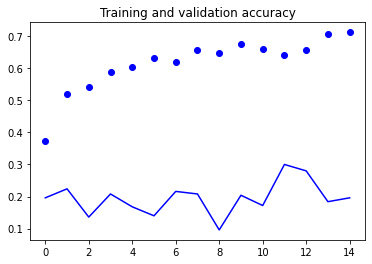

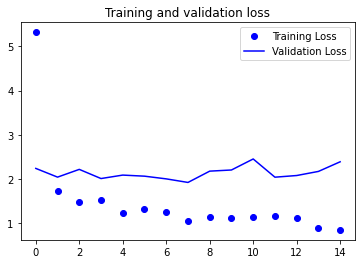

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()